# **Classify Movie reviews: Binary Classification problem**

# **The IMDB dataset**

In [22]:
from keras.datasets import imdb
(train_data, train_lab),(test_data,test_lab) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [23]:
train_data.shape,train_lab.shape,test_data.shape,test_lab.shape

((25000,), (25000,), (25000,), (25000,))

In [24]:
word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

In [27]:
train_lab[0],train_lab[1]

(1, 0)

In [21]:
#print(train_data[0])   #when all words are considered

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [25]:
print(train_data[0])   #when top 10000 most-frequent words are considered

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [28]:
#As we can see values 22665, 21631 in 1st case are converted to 2 when only 10,000 words are considered
#0,1,2 are reserved for indices for "padding", "start of sequence" and "unknown".
#This means dataset is loaded with a condition
#that any index > num_words is set to 2.

In [29]:
#Here, 10000 words are most freq, this is because their indexing has been done in an order that
#more the frequent the word is, smaller will be its index

#eg. {word:freq:index}  {'a':1000:3, 'b':990:4, 'c':600:5,..........,'x':12:9999,'y':10:10000}

In [30]:
' '.join([index_word.get(i-3,'?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **Preparing Data**

In [31]:
import numpy as np

In [35]:
def encode_data(data,dim=10000): #since, max_index = 9999
  results = np.zeros((data.shape[0],dim))
  for i,x in enumerate(data):
    results[i,x] = 1
  return results

In [37]:
x_train = encode_data(train_data)
x_test = encode_data(test_data)

## **Network Building**

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,))) #since, size of each vector is 10000
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(x_train,train_lab,epochs=20, batch_size=100, validation_split=0.3, verbose=1)

Epoch 1/20
175/175 [==============================] - 4s 18ms/step - loss: 0.4488 - accuracy: 0.7902 - val_loss: 0.2680 - val_accuracy: 0.8925
Epoch 2/20
175/175 [==============================] - 3s 16ms/step - loss: 0.1791 - accuracy: 0.9354 - val_loss: 0.2767 - val_accuracy: 0.8887
Epoch 3/20
175/175 [==============================] - 3s 16ms/step - loss: 0.1315 - accuracy: 0.9531 - val_loss: 0.3320 - val_accuracy: 0.8791
Epoch 4/20
175/175 [==============================] - 3s 16ms/step - loss: 0.0897 - accuracy: 0.9691 - val_loss: 0.3704 - val_accuracy: 0.8816
Epoch 5/20
175/175 [==============================] - 3s 16ms/step - loss: 0.0594 - accuracy: 0.9793 - val_loss: 0.4569 - val_accuracy: 0.8820
Epoch 6/20
175/175 [==============================] - 3s 16ms/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.5752 - val_accuracy: 0.8765
Epoch 7/20
175/175 [==============================] - 3s 16ms/step - loss: 0.0172 - accuracy: 0.9954 - val_loss: 0.6649 - val_accuracy: 0.8752

In [47]:
model.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/model2.h5')

## **Model Evaluation**

In [51]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 **Training v/s Validation**

In [54]:
import matplotlib.pyplot as plt

train_acc = dict_['accuracy']
train_loss = dict_['loss']
val_acc = dict_['val_accuracy']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

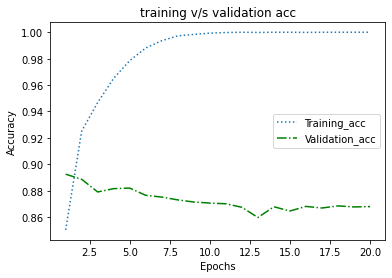

In [57]:
plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

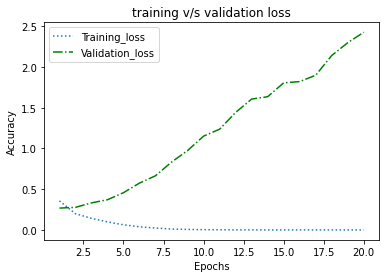

In [58]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

**Results on test data**

**Overall loss nd accuracy**

In [59]:
loss,acc = model.evaluate(x_test,test_lab)

782/782 [==============================] - 2s 3ms/step - loss: 2.6479 - accuracy: 0.8518


In [60]:
print('Loss: ',loss)
print('Acc: ',acc)

Loss:  2.6479454040527344
Acc:  0.8518400192260742


**precision, recall and f1-score on a per-class basis**

In [61]:
from sklearn.metrics import classification_report,accuracy_score

In [76]:
preds = model.predict(x_test)

In [77]:
preds[0],preds[1],preds[2],preds[3]

(array([0.00118604], dtype=float32),
 array([1.], dtype=float32),
 array([0.1254977], dtype=float32),
 array([0.9999919], dtype=float32))

In [78]:
test_lab[:4]

array([0, 1, 1, 0])

In [79]:
pred_lab = np.round(preds)

In [80]:
print(classification_report(pred_lab, test_lab))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     12698
         1.0       0.84      0.86      0.85     12302

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [81]:
accuracy_score(pred_lab,test_lab) #same as we got usinh model.evaluate

0.85184